In [32]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import warnings as w
w.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [33]:
#reading and backing up the data
cdata=pd.read_csv(r"C:\Users\Maha\Downloads\archive\CarPrice_Assignment.csv",header=0)
cdata_bk=cdata.copy()
cdata.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
93,94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,2024,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7349.0
148,149,0,subaru dl,gas,std,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2420,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013.0
77,78,2,mitsubishi lancer,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1944,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189.0
183,184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2209,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34,7975.0
85,86,1,mitsubishi montero,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2365,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.40,23.0,68,4500,37,42,9495.0
37,38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0
155,156,0,toyota carina,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0
45,46,0,isuzu D-Max V-Cross,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5


In [34]:
#information of the dataset
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [35]:
#describing the dataset
cdata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


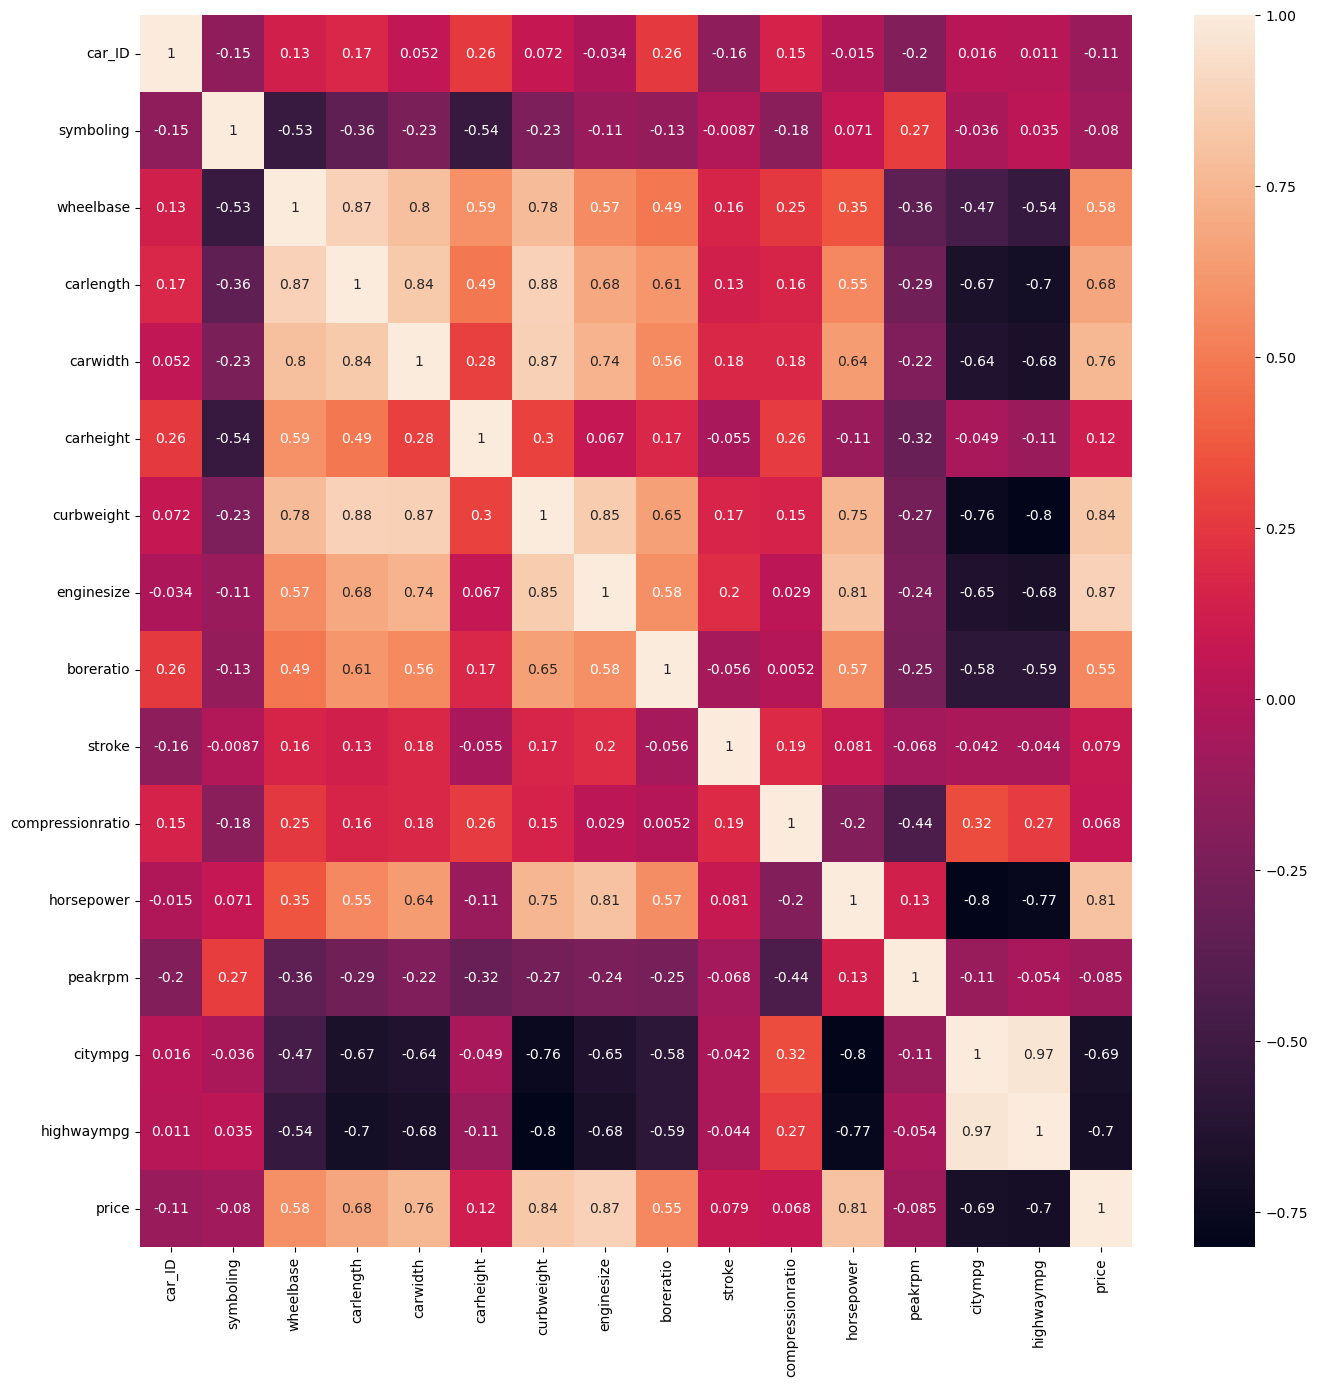

In [36]:
#heatmap for the representing the correlation between variables
plt.figure(figsize=(16, 16))
correlation = cdata.corr()
s.heatmap(correlation, annot=True)
# Show the plots
plt.show()

In [37]:
#columns in the dataset
cdata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [38]:
#deleting the columns that influences the dependent variable least
newcdata=cdata.drop(["car_ID", "symboling","CarName", "fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","carheight","enginetype","cylindernumber","fuelsystem","stroke","compressionratio","peakrpm","citympg","highwaympg"],axis='columns')

In [39]:
#check if there are any duplicates
cdata_d=cdata[cdata.duplicated(keep='last')]
cdata_d

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [40]:
#check if there are any null values
cdata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [41]:
#representing the 5 rows of dataset
newcdata.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0


In [42]:
#information about the dataset
newcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   boreratio   205 non-null    float64
 6   horsepower  205 non-null    int64  
 7   price       205 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 12.9 KB


In [43]:
#identifying the independent and dependent variables
indepvar=[]
for col in newcdata.columns:
    if col!='price':
        indepvar.append(col)
tarvar='price'
x=newcdata[indepvar]
y=newcdata[tarvar]

In [44]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((143, 7), (62, 7), (143,), (62,))

In [45]:
#columns to be scaled
col=['wheelbase','carlength','carwidth','curbweight','boreratio','enginesize','horsepower']

In [46]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
x_train[col]=scal.fit_transform(x_train[col])
x_train=pd.DataFrame(x_train)
x_test[col]=scal.fit_transform(x_test[col])
x_test=pd.DataFrame(x_test)

# LinearRegression

In [47]:
#train the algorithm and build the model with train dataset
from sklearn.linear_model import LinearRegression
#create an object for regression model
model=LinearRegression()
#train the model with training dataset
model.fit(x_train,y_train)
#predict the model with test dataset
y_pred=model.predict(x_test)


In [48]:
#evaluation metrics for  the regression model
from sklearn import metrics
r2_lm=round(metrics.r2_score(y_test,y_pred),3)
MAE_lm=round(metrics.mean_absolute_error(y_test,y_pred),3)
RMSE_lm=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3)
print("mean absolute error:",MAE_lm)
print("mean squared error:",round(metrics.mean_squared_error(y_test,y_pred),3))
print("root mean squared error:",RMSE_lm)
print("R2 score:",r2_lm)
print("mean absolute percentage error:",round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print("root mean square log error:",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

mean absolute error: 4422.921
mean squared error: 29096723.923
root mean squared error: 5394.138
R2 score: 0.58
mean absolute percentage error: 41.3 %
root mean square log error: 8.593


In [49]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.565117


# DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
#create an object for regression model
model=DecisionTreeRegressor()
#train the model with training dataset
model.fit(x_train,y_train)
#predict the model with test dataset
y_pred=model.predict(x_test)


In [51]:
#evaluation metrics for  the regression model
from sklearn import metrics
r2_dt=round(metrics.r2_score(y_test,y_pred),3)
MAE_dt=round(metrics.mean_absolute_error(y_test,y_pred),3)
RMSE_dt=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3)
print("mean absolute error:",MAE_dt)
print("mean squared error:",round(metrics.mean_squared_error(y_test,y_pred),3))
print("root mean squared error:",RMSE_dt)
print("R2 score:",r2_dt)
print("mean absolute percentage error:",round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print("root mean square log error:",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

mean absolute error: 3625.384
mean squared error: 27491912.798
root mean squared error: 5243.273
R2 score: 0.603
mean absolute percentage error: 28.675 %
root mean square log error: 8.565


In [52]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.589103


# RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
#create an object for regression model
model=RandomForestRegressor()
#train the model with training dataset
model.fit(x_train,y_train)
#predict the model with test dataset
y_pred=model.predict(x_test)


In [54]:
#evaluation metrics for  the regression model
from sklearn import metrics
r2_rf=round(metrics.r2_score(y_test,y_pred),3)
MAE_rf=round(metrics.mean_absolute_error(y_test,y_pred),3)
RMSE_rf=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3)
print("mean absolute error:",MAE_rf)
print("mean squared error:",round(metrics.mean_squared_error(y_test,y_pred),3))
print("root mean squared error:",RMSE_rf)
print("R2 score:",r2_rf)
print("mean absolute percentage error:",round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print("root mean square log error:",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

mean absolute error: 3818.229
mean squared error: 24751584.53
root mean squared error: 4975.096
R2 score: 0.643
mean absolute percentage error: 32.634 %
root mean square log error: 8.512


In [55]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)


Adj R Square:  0.63006


# KNeighborsRegressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
#train the model with training dataset
model.fit(x_train,y_train)
#predict the model with test dataset
y_pred=model.predict(x_test)

In [57]:
#evaluation metrics for  the regression model
from sklearn import metrics
r2_kn=round(metrics.r2_score(y_test,y_pred),3)
MAE_kn=round(metrics.mean_absolute_error(y_test,y_pred),3)
RMSE_kn=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3)
print("mean absolute error:",MAE_kn)
print("mean squared error:",round(metrics.mean_squared_error(y_test,y_pred),3))
print("root mean squared error:",RMSE_kn)
print("R2 score:",r2_kn)
print("mean absolute percentage error:",round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print("root mean square log error:",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

mean absolute error: 2630.167
mean squared error: 13861199.91
root mean squared error: 3723.063
R2 score: 0.8
mean absolute percentage error: 19.864 %
root mean square log error: 8.222


In [58]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)


Adj R Square:  0.792829


# ExtraTreesRegressor

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
#train the model with training dataset
model.fit(x_train,y_train)
#predict the model with test dataset
y_pred=model.predict(x_test)

In [60]:

from sklearn import metrics
r2_et=round(metrics.r2_score(y_test,y_pred),3)
MAE_et=round(metrics.mean_absolute_error(y_test,y_pred),3)
RMSE_et=round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3)
print("mean absolute error:",MAE_et)
print("mean squared error:",round(metrics.mean_squared_error(y_test,y_pred),3))
print("root mean squared error:",RMSE_et)
print("R2 score:",r2_et)
print("mean absolute percentage error:",round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print("root mean square log error:",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

mean absolute error: 3812.458
mean squared error: 20462346.198
root mean squared error: 4523.532
R2 score: 0.705
mean absolute percentage error: 33.588 %
root mean square log error: 8.417


In [61]:
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)


Adj R Square:  0.694167


# Comparing the results of all algorithms

In [62]:
pd.DataFrame(data=[[r2_lm, MAE_lm, RMSE_lm], [r2_dt, MAE_dt, RMSE_dt], [r2_rf, MAE_rf, RMSE_rf],[r2_et, MAE_et, RMSE_et],[r2_kn, MAE_kn, RMSE_kn]], 
             index=['Linear Regression',"Decision Tree", "Random Forest","Extra Trees","KNN"], 
             columns=["R2 Score", "MAE", "RMSE"])

,R2 Score,MAE,RMSE
Linear Regression,0.580,4422.921,5394.138
Decision Tree,0.603,3625.384,5243.273
Random Forest,0.643,3818.229,4975.096
Extra Trees,0.705,3812.458,4523.532
KNN,0.800,2630.167,3723.063
